In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Assuming continuous operation.

# input and output voltage in V
Vin = 12
Vout = 200

# output current in A
Iout = 40e-3

# frequency of operation in Hz, using MAX1771
f = 300 * 1e3

# inductance in H
L = 1000 * 1e-6

# output capacitor in F
C = 2 * 0.1 * 1e-6

# dutycycle
duty_cycle = 1 - Vin/Vout

# average input current
Iin = 1 / (1-duty_cycle) * Iout

# period
t = 1/f

# input ripple current, V = L dI/dt
Iripple = Vin/L * duty_cycle * t

# output ripple voltage
Vripple = Iout * duty_cycle * t / C

print("Icri = (1/2Lf)Vi^2/Vo^2(Vo-Vi) =", 1000*0.5/(f*L)*(Vin/Vout)**2*(Vout-Vin), "mA" )
print("")

if Iin-Iripple/2 > 0 :
    print("The boost converter is in continuous mode.")
    print("Vi:", round(Vin,2), 'V')
    print("Vo:", round(Vout,2), 'V')
    print("Duty cycle:", round(duty_cycle,3) )
    print("")
    print("L:", round(L*1e6,2), 'uH')
    print("C:", round(C*1e6,2), 'uF')
    print("")
    print("Iout:", round(Iout * 1000,2), 'mA')
    print("Iavg:", round(Iin * 1000,2), 'mA')
    print("Imin:", round(1000*(Iin-Iripple/2),2), 'mA')
    print("Imax:", round(1000*(Iin+Iripple/2),2), 'mA')
    print("Irip:", round(100*Iripple/Iin,2), '%')
    print("")
    print("Vout ripple:", round(Vripple,5), 'V', '(',round(100*Vripple/Vout,5),'% )' )

else:
    print("The boost converter is in discontinuous mode.")
    
    duty_cycle = 1/Vin * np.sqrt( 2 * Iout * (Vout-Vin)*L/t)
    
    tx = Vin/(Vout-Vin) * duty_cycle * t
    
    Imax = Vin * duty_cycle * t/L
    
    Vripple = Iout * duty_cycle * t / C
    
    print("Vi:", round(Vin,2), 'V')
    print("Vo:", round(Vout,2), 'V')
    print("Duty cycle = 1/Vin*sqrt(2*Iout*(Vout-Vin)*Lf)=", round(duty_cycle,3) )
    
    print("Iout:", round(1000*Iout,3), 'mA')
    print("Imax=sqrt(2*Iout*(Vout-Vin)/(Lf))=", round(1000*Imax,3), 'mA' )
    
    print("Vout ripple:", round(Vripple,6), 'V', '(',round(100*Vripple/Vout,6),'% )' )


Icri = (1/2Lf)Vi^2/Vo^2(Vo-Vi) = 1.1280000000000001 mA

The boost converter is in continuous mode.
Vi: 12 V
Vo: 200 V
Duty cycle: 0.94

L: 1000.0 uH
C: 0.2 uF

Iout: 40.0 mA
Iavg: 666.67 mA
Imin: 647.87 mA
Imax: 685.47 mA
Irip: 5.64 %

Vout ripple: 0.62667 V ( 0.31333 % )


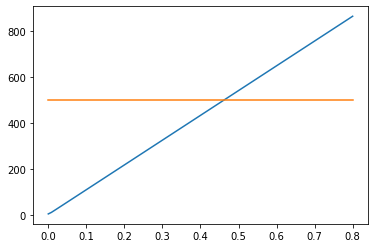

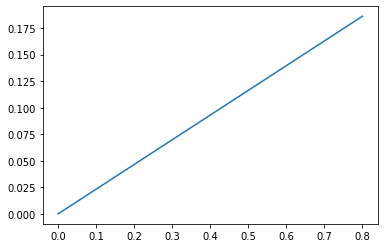

In [22]:
# Assuming discontinuous operation.

# input voltage in V
Vin = 5

# Assume purely resistive load
R = 2.e6

# frequency of operation in Hz
f = 32e6/700
    # in MCU digital period counter notation

# inductance in H
L = 470 * 1e-6

# duty cycle
duty_cycle = np.linspace( 0, 0.8, 100 )

# Compute output voltage
Vout = Vin/2 * (1 + np.sqrt( 1+2*duty_cycle*duty_cycle*R/(L*f) ) )

Vtarget = 500*np.ones( len(duty_cycle) )

# output current in A
Imax = Vin * duty_cycle * t/L

plt.figure()
plt.plot( duty_cycle, Vout )
plt.plot( duty_cycle, Vtarget )

plt.figure()
plt.plot( duty_cycle, Imax )